# Disney Exploratory Data Analysis with Customer Segmentation & Targeting 
## AD654: Marketing Analytics Project 
## By: Alana Ahart 

## What the project is about: 
This project is divided into two main sections. The first involves conducting exploratory data analysis on a dataset of Disney movies to identify patterns, trends, and insights. The second applies customer segmentation using k-means clustering to better understand Disney’s customer base and provide recommendations for targeted marketing strategies.

## Why it matters: 
This matters because understanding both content performance and customer segments enables Disney to make data driven decisions that improve customer engagement and maximize revenue.

## Tools & Methods: 
- Customer Segmentation: K-Means Clustering 
- Programming & Analysis: Python (Jupyter Notebook, Google Colab)
- Data Handling & Visualization: pandas, matplotlib, Seaborn 

# Summary Stats of Disney Movies 
***

For this portion of the project, I worked with a dataset of Disney movies and conducted exploratory data analysis to uncover patterns, trends, and key insights within the data.

In [13]:
#importing pandas 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:

url = 'https://raw.githubusercontent.com/alanaahart/AD654-Disney-Segmentation/refs/heads/main/data/disney_movies.csv'
df_disney_movies = pd.read_csv(url)

In [19]:
df_disney_movies.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [23]:
df_disney_movies.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [25]:
#review summary stats of data & check for any impossible values 
df_disney_movies.describe()


,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [27]:
#check for NaN values 
df_disney_movies.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [29]:
#reviewing datat with NaN values 
rows_with_nan_genre = df_disney_movies[df_disney_movies['genre'].isnull()]

In [31]:
rows_with_nan_genre

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
22,Herbie Goes to Monte Carlo,1977-06-24,NaN,NaN,28000000,105847527
23,The Black Hole,1979-12-21,NaN,NaN,35841901,120377374
24,Midnight Madness,1980-02-08,NaN,NaN,2900000,9088096
25,The Last Flight of Noah’s Ark,1980-06-25,NaN,NaN,11000000,34472116
26,The Devil and Max Devlin,1981-01-01,NaN,NaN,16000000,48517980
121,Newsies,1992-04-08,NaN,PG,2706352,5497481
122,Passed Away,1992-04-24,NaN,PG-13,4030793,8187848
128,A Gun in Betty Lou's Handbag,1992-08-21,NaN,PG-13,3591460,7295423
146,Bound by Honor,1993-04-16,NaN,R,4496583,9156084


In [33]:
#reviewing data with NaN values 
rows_with_nan_mpaarating = df_disney_movies[df_disney_movies['mpaa_rating'].isnull()]

In [35]:
rows_with_nan_mpaarating


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686
16,The Boatniks,1970-07-01,Comedy,NaN,18607492,101200742
17,Bedknobs and Broomsticks,1971-10-07,Musical,NaN,17871174,91305448
18,The Apple Dumpling Gang,1975-07-01,Comedy,NaN,31916500,131246872
19,Freaky Friday,1977-01-21,Comedy,NaN,25942000,98067733
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0


In [37]:
zero_values = df_disney_movies[df_disney_movies['total_gross'] == 0]

In [39]:
zero_values

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
27,Amy,1981-03-20,Drama,NaN,0,0
29,Condorman,1981-08-07,Action,NaN,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0


In [41]:
zero_values_inflation = df_disney_movies[df_disney_movies['inflation_adjusted_gross']==0]

In [43]:
zero_values_inflation

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
27,Amy,1981-03-20,Drama,NaN,0,0
29,Condorman,1981-08-07,Action,NaN,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0


NaN values are present in approximately 9.6% of the dataset.  There are also four movies that do not have data for total_gross and inflation_adjusted_gross.  Any row with NaN and 0 values are have been removed. 

In [46]:
#removing rows with NaN and 0 values 
df_disney_movies = df_disney_movies.dropna()


In [48]:
df_disney_movies.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [50]:
df_disney_movies

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [52]:
#group by genre to show revenue and inflation adjusted gross revenue 
df_groupby_mean = df_disney_movies.groupby('genre')[['total_gross','inflation_adjusted_gross']].mean()

In [54]:
df_groupby_mean = pd.DataFrame(df_groupby_mean)
pd.options.display.float_format='{:.2f}'.format
df_groupby_mean.transpose()

genre,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
total_gross,114513592.06,135953470.29,32514404.00,48088475.79,51728233.00,11292851.19,38968669.54,16282557.00,75960865.40,50935591.91,60613045.26,51287351.29
inflation_adjusted_gross,148601246.03,197180077.51,52243491.67,87310638.62,57410839.00,12718026.12,77356071.24,25069265.40,637750688.53,78213256.05,92418642.00,73815706.57


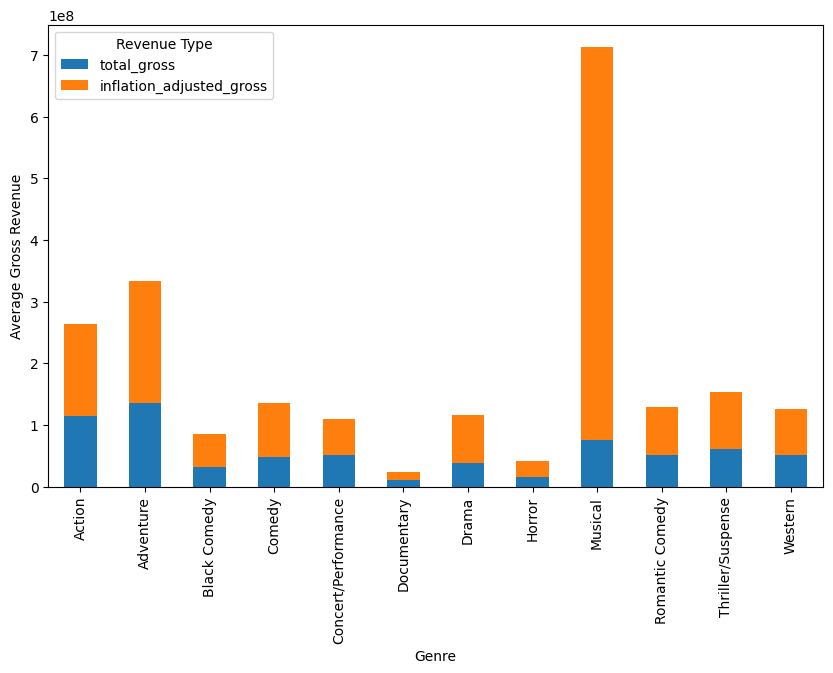

In [56]:
df_groupby_mean.plot(kind='bar', stacked = True, figsize=(10,6))
plt.xlabel('Genre')
plt.ylabel('Average Gross Revenue')
plt.legend(title='Revenue Type')

In [60]:
#group by genre and mpaa_rating to show total gross revenue. 
df_groupby = df_disney_movies.groupby(['genre','mpaa_rating'])['total_gross'].mean()
pd.options.display.float_format='{:.2f}'.format

In [61]:
df_groupby

genre                mpaa_rating
Action               PG             42385924.00
                     PG-13         166405170.21
                     R              62405121.67
Adventure            G             113183079.19
                     PG            128949508.04
                     PG-13         233934567.18
                     R              32588013.00
Black Comedy         R              32514404.00
Comedy               G             100845217.59
                     Not Rated       9230769.00
                     PG             52303658.82
                     PG-13          33870387.95
                     R              26204917.57
Concert/Performance  G              51728233.00
Documentary          G              17440665.50
                     Not Rated        314000.00
                     PG              1192992.80
Drama                G              67994825.40
                     PG             54437916.18
                     PG-13          38697594.16
       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Musical'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Romantic Comedy'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Thriller/Suspense'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Western'),
  Text(9, 0, 'Black Comedy'),
  Text(10, 0, 'Documentary'),
  Text(11, 0, 'Concert/Performance')])

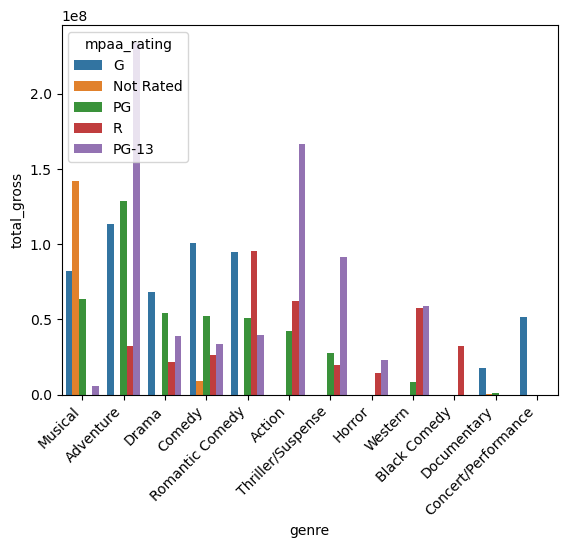

In [22]:
sns.barplot(x='genre', y='total_gross',hue='mpaa_rating',errorbar=None, data=df_disney_movies)
plt.xticks(rotation=45, ha = 'right')

In [23]:
#review column names 
print(df_disney_movies.columns)

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')


In [24]:
#get the year from the release date 
df_disney_movies.loc[:,'release_year']=pd.to_datetime(df_disney_movies['release_date']).dt.year

                                                

In [25]:
#group by year for total gross revenue and inflation adjust gross revenue 
df_groupby_year = df_disney_movies.groupby('release_year')[['total_gross','inflation_adjusted_gross']].sum()


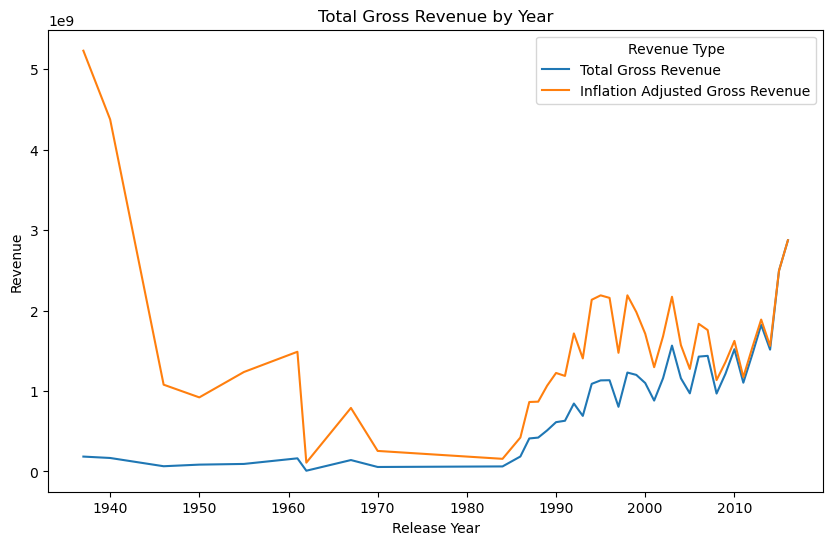

In [26]:
plt.figure(figsize=(10,6))
plt.plot(df_groupby_year.index,df_groupby_year['total_gross'],label='Total Gross Revenue')
plt.plot(df_groupby_year.index,df_groupby_year['inflation_adjusted_gross'],label='Inflation Adjusted Gross Revenue')
plt.title('Total Gross Revenue by Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.legend(title='Revenue Type')
plt.show()

In [27]:
#group by mpaa_rating and revenue 
df_groupby_year_rating = df_disney_movies.groupby('mpaa_rating')[['total_gross','inflation_adjusted_gross']].sum()

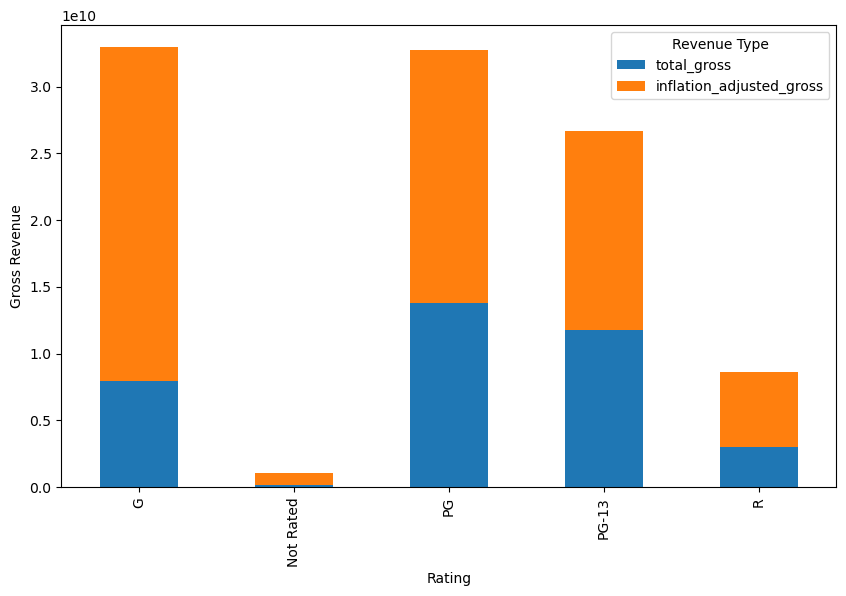

In [28]:
df_groupby_year_rating.plot(kind='bar', stacked = True, figsize=(10,6))
plt.xlabel('Rating')
plt.ylabel('Gross Revenue')
plt.legend(title='Revenue Type')




### Conclusion

The analysis of Disney Parks data revealed trends in revenue across different movie genres, ratings, and release year. When grouped by genre, musicals and adventure movies generated the most revenue. When grouped by movie rating and genre, PG-13 movies generated signifcant revenue in several genre categories, including adventure, action, and thriller/suspense. PG movies were influential across a wide range of genres, contributing to the gross revenue in 8 out of the 12 movie genre categories. 
The analysis of gross and inflation-adjusted revenues  revealed that movies released in the 1940s generated the highest revenue when inflation is considered. In the 2000s, there was some variablility in revenue generation, but the overall trend has been upward. Finally, a comparison of gross revenue by movie ratings showed that G and PG-rated films have been the most successful when adjusted for inflation, while R-rated and Not Rated movies have generated the least revenue. 

# Segmentation and Targeting 
***

Customer segmentation using k-means clustering to better understand Disney’s customer base and provide recommendations for targeted marketing strategies.

In [58]:
url = 'https://raw.githubusercontent.com/alanaahart/AD654-Disney-Segmentation/refs/heads/main/data/family_segments.csv'
df = pd.read_csv(url)

In [60]:
df=pd.read_csv(r'/Users/alanaahart/Downloads/family_segments.csv')

In [62]:
df.head()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,1,7525,7825,1,0,2,9.00,0,826.00,2309.00,4094.00,701
1,2,639815,449775,1,1,2,11.00,0,1779.00,9060.00,8670.00,764
2,3,288847,204750,1,6,3,13.00,1,2121.00,6436.00,5021.00,720
3,4,191791,136730,1,1,1,8.00,1,1880.00,13107.00,66074.00,783
4,5,96527,72165,0,3,0,NaN,0,775.00,2042.00,2846.00,757


In [31]:
df_new = df.drop('hhold_ID',axis = 1)

In [32]:
df_new.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,96527,72165,0,3,0,NaN,0,775.0,2042.0,2846.0,757


In [33]:
df_new.describe()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9.250000e+03,9.250000e+03,9250.000000,9250.000000,9250.000000,8724.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000
mean,6.739056e+05,4.758774e+05,0.724216,2.669946,2.224000,11.981774,0.645730,1324.083568,8233.196108,8933.807784,750.275459
std,1.335709e+06,8.764279e+05,0.446933,3.295406,1.124236,2.018205,0.478317,537.160465,10296.726389,13101.418846,25.329610
min,5.100000e+01,3.700000e+02,0.000000,0.000000,0.000000,5.000000,0.000000,669.000000,0.000000,2.000000,655.000000
25%,4.264950e+04,3.327000e+04,0.000000,1.000000,1.000000,11.000000,0.000000,786.000000,1757.000000,1891.000000,733.000000
50%,1.666520e+05,1.224650e+05,1.000000,2.000000,2.000000,12.000000,1.000000,1378.500000,3880.000000,3632.000000,750.000000
75%,6.488230e+05,4.553300e+05,1.000000,3.000000,3.000000,13.000000,1.000000,1804.000000,9948.750000,9203.750000,768.000000
max,9.883250e+06,5.497405e+06,1.000000,47.000000,7.000000,18.000000,1.000000,2759.000000,49885.000000,74805.000000,847.000000


In [34]:
import numpy as np

In [35]:
#check for NaN values 
df_new.isnull().sum()

est_net_worth           0
est_inc                 0
domestic                0
number_visits           0
number_children         0
oldest_child_age      526
dis_plus_sub            0
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

In [36]:
#review data with NaN values 
rows_with_nan_oldest_child = df_new[df_new['oldest_child_age'].isnull()]

In [37]:
print(rows_with_nan_oldest_child)

      est_net_worth  est_inc  domestic  number_visits  number_children  \
4             96527    72165         0              3                0   
8             28620    25550         1              5                0   
18            14809    10750         1              6                0   
20            13063   285000         0              4                0   
34            15853    14920         1              2                0   
...             ...      ...       ...            ...              ...   
9153         122215    94795         1              1                0   
9178         540428   381835         1              1                0   
9182         137196    98770         1              1                0   
9220         178596   127960         1              1                0   
9226         280823   199610         1              1                0   

      oldest_child_age  dis_plus_sub  online_merch_avg  est_annual_travel  \
4                  NaN            

In [38]:
#replace NaN values with 0 
df_new['oldest_child_age']=df_new['oldest_child_age'].fillna(0)

In [39]:
df_new.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,96527,72165,0,3,0,0.0,0,775.0,2042.0,2846.0,757


In [40]:
#Recheck for NaN values 
df_new.isnull().sum()

est_net_worth         0
est_inc               0
domestic              0
number_visits         0
number_children       0
oldest_child_age      0
dis_plus_sub          0
online_merch_avg      0
est_annual_travel     0
est_annual_leisure    0
est_hhold_FICO        0
dtype: int64

The data has 526 NaN values for the oldest_child_age column. After reviewing the data, there are NaN values for families that do not have children.  The NaN values have been replaced with '0'. 

In [41]:
#normalize the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df_new)
df_normalized = scaler.transform(df_new)
df_normalized = pd.DataFrame(data=df_normalized,index = df_new.index, columns = df_new.columns)

In [42]:
df_normalized

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,-0.498923,-0.534074,0.617092,-0.810246,-0.199257,-0.677168,-1.350075,-0.927303,-0.575379,-0.369431,-1.945475
1,-0.025524,-0.029784,0.617092,-0.506777,-0.199257,-0.088437,-1.350075,0.846937,0.080302,-0.020137,0.541867
2,-0.288296,-0.309372,0.617092,1.010569,0.690284,0.500294,0.740699,1.483653,-0.174550,-0.298671,-1.195324
3,-0.360962,-0.386986,0.617092,-0.506777,-1.088798,-0.971533,0.740699,1.034973,0.473361,4.361610,1.292018
4,-0.432287,-0.460659,-1.620503,0.100161,-1.978339,-3.326456,-1.350075,-1.022252,-0.601311,-0.464693,0.265496
...,...,...,...,...,...,...,...,...,...,...,...
9245,-0.407500,-0.434175,0.617092,-0.506777,-0.199257,-0.088437,-1.350075,-0.945920,-0.752338,-0.352333,0.660312
9246,3.268634,3.480734,0.617092,1.617507,-0.199257,1.677755,0.740699,0.774329,1.486456,4.433515,0.028606
9247,-0.310434,-0.332387,0.617092,-0.810246,-0.199257,-0.677168,0.740699,0.966088,-0.185816,-0.235927,-0.050357
9248,-0.472010,-0.504920,0.617092,-0.506777,-0.199257,0.500294,-1.350075,-1.050178,-0.681632,-0.591175,1.607871


In [43]:
#check the STD 
df_normalized.describe()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03,9.250000e+03
mean,2.093220e-17,-3.571918e-17,3.072617e-17,3.149433e-17,-2.026967e-16,1.467175e-16,1.286658e-17,-5.569119e-18,-1.305862e-17,-5.319469e-17,-2.070176e-15
std,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,-5.045192e-01,-5.425810e-01,-1.620503e+00,-8.102463e-01,-1.978339e+00,-3.326456e+00,-1.350075e+00,-1.219596e+00,-7.996368e-01,-6.817804e-01,-3.761630e+00
25%,-4.726254e-01,-5.050402e-01,-1.620503e+00,-5.067771e-01,-1.088798e+00,-3.828023e-01,-1.350075e+00,-1.001773e+00,-6.289908e-01,-5.375898e-01,-6.820631e-01
50%,-3.797840e-01,-4.032636e-01,6.170925e-01,-2.033080e-01,-1.992572e-01,2.059285e-01,7.406993e-01,1.013093e-01,-4.227976e-01,-4.046962e-01,-1.087559e-02
75%,-1.877948e-02,-2.344574e-02,6.170925e-01,1.001612e-01,6.902838e-01,5.002938e-01,7.406993e-01,8.934805e-01,1.666206e-01,2.060516e-02,6.997936e-01
max,6.895095e+00,5.729849e+00,6.170925e-01,1.345281e+01,4.248448e+00,1.972121e+00,7.406993e-01,2.671444e+00,4.045369e+00,5.028063e+00,3.818842e+00


In [44]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [45]:
#choose variables to keep for model 
variables_to_drop = ['est_net_worth','est_hhold_FICO','oldest_child_age']
df_kmodel = df_normalized.drop(columns= variables_to_drop)

In [46]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


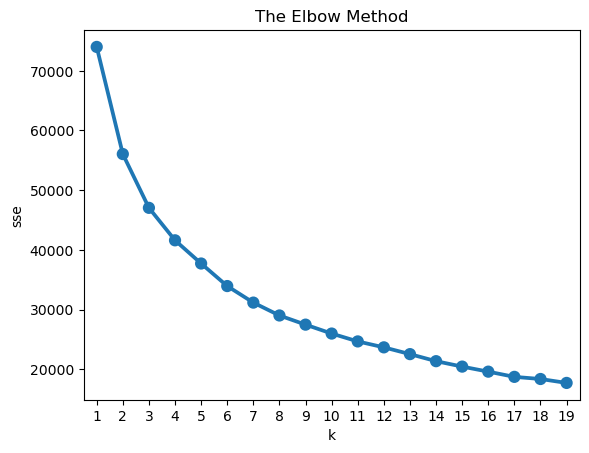

In [47]:
#elbow method to determine the amount of clusters 
sse = {}
for k in range (1,20): 
    kmeans = KMeans(n_clusters = k, random_state = 654, n_init=10)
    kmeans.fit(df_kmodel)
    sse[k]=kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('sse')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));

The elbow method was used to determine the optimal number of clusters.  After reviewing the graph, eight clusters were selected for the k-means model. 

In [48]:
#build kMeans Model 
model=KMeans(n_clusters=8, random_state = 654, n_init = 10)
model.fit(df_kmodel)
labels = model.predict(df_kmodel)

In [49]:
df2 = df_kmodel.assign(Cluster= labels)
df2.groupby(['Cluster']).agg({
    'est_inc': 'mean',
    'domestic': 'mean',
    'number_visits': 'mean',
    'number_children': 'mean',
    'dis_plus_sub': 'mean', 
    'online_merch_avg': 'mean',
    'est_annual_travel': 'mean',
    'est_annual_leisure': 'mean'
}).round(2)


,est_inc,domestic,number_visits,number_children,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure
Cluster,,,,,,,,
0,-0.19,0.14,3.83,-0.14,0.12,0.03,-0.17,-0.21
1,-0.50,0.62,-0.06,0.12,0.74,-0.93,-0.51,-0.47
2,0.02,0.62,-0.12,0.09,0.64,0.99,0.01,-0.05
3,-0.44,0.62,-0.20,-0.11,-1.35,-0.68,-0.48,-0.44
4,3.79,0.08,0.04,-0.06,0.38,0.98,1.17,2.56
5,0.07,-1.62,-0.19,-0.08,0.36,0.91,0.06,0.04
6,-0.49,-1.62,-0.15,-0.03,-0.38,-0.98,-0.55,-0.50
7,0.98,0.09,-0.07,0.04,0.33,0.96,2.33,1.68


In [50]:
cluster_sizes = df2['Cluster'].value_counts()
print(cluster_sizes)

Cluster
3    2027
2    1990
1    1523
6    1244
5     956
7     849
4     362
0     299
Name: count, dtype: int64


In [51]:
#summary stats of clusters 
sum_stats = df2.groupby('Cluster').agg(['mean', 'median','std','min','max'])
print(sum_stats)

          est_inc                                          domestic            \
             mean    median       std       min       max      mean    median   
Cluster                                                                         
0       -0.193519 -0.428219  0.664482 -0.539181  4.621464  0.138142  0.617092   
1       -0.495553 -0.505405  0.036793 -0.541508 -0.403275  0.617092  0.617092   
2        0.018528 -0.151994  0.571490 -0.537669  3.558643  0.617092  0.617092   
3       -0.436334 -0.493681  0.186228 -0.542570  2.585014  0.617092  0.617092   
4        3.789557  3.766145  1.027625  1.761957  5.729849  0.079328  0.617092   
5        0.072174 -0.139137  0.624487 -0.445089  3.721217 -1.620503 -1.620503   
6       -0.493511 -0.503768  0.037395 -0.542581 -0.359122 -1.620503 -1.620503   
7        0.981480  1.021939  0.801603 -0.406322  3.653712  0.089979  0.617092   

                                       ... est_annual_travel            \
              std       min       

Text(0, 0.5, 'Standardized Number of Children')

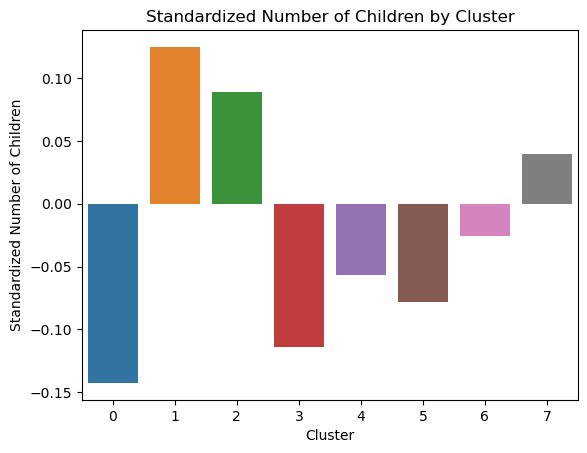

In [52]:
sns.barplot(x='Cluster', y = 'number_children',errorbar=None, data = df2)
plt.title('Standardized Number of Children by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Number of Children')

The bar chart shows standardized data for the number of children in each cluster.  Cluster one is most likely not to have children, while clusters two and three are more likely to have more children compared to the other clusters. 

Text(0, 0.5, 'Standardized Number of Visits')

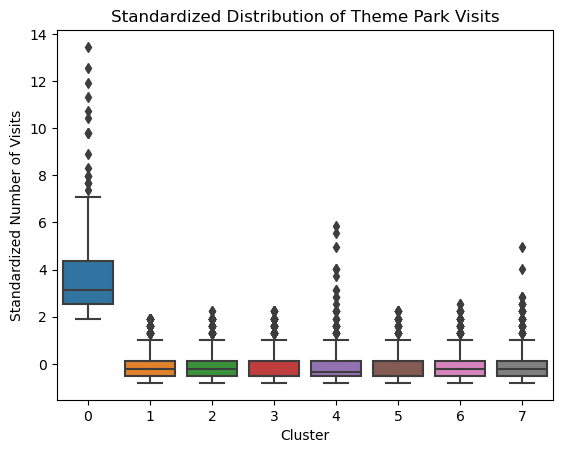

In [53]:
sns.boxplot(x='Cluster',y='number_visits',data=df2)
plt.title('Standardized Distribution of Theme Park Visits')
plt.xlabel('Cluster')
plt.ylabel('Standardized Number of Visits')


The boxplot shows the distribution of number of visits for each cluster. The medians for cluster four and six are lower compared to the other clusters, suggesting that these groups are most likely to be infrequent visitors to the parks, if they visit at all.  Cluster one has the highest median for number of park visits, this group most likely consists of frequent visitors to the parks. 

Text(0, 0.5, 'Standardized Number of Visits')

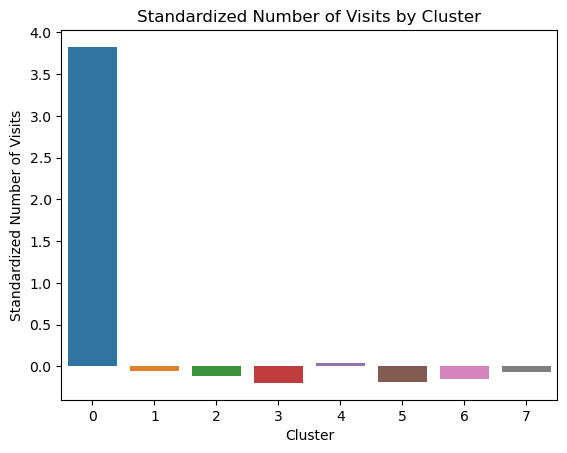

In [54]:
sns.barplot(x='Cluster', y = 'number_visits',errorbar=None, data = df2)
plt.title('Standardized Number of Visits by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Number of Visits')


The bar chart shows the standardized number of visits for each cluster. This alligns with the box plot, indicating that people in cluster one visit the parks more frequently compared to the other clusters. Cluster five visits the parks at a rate close to the average.

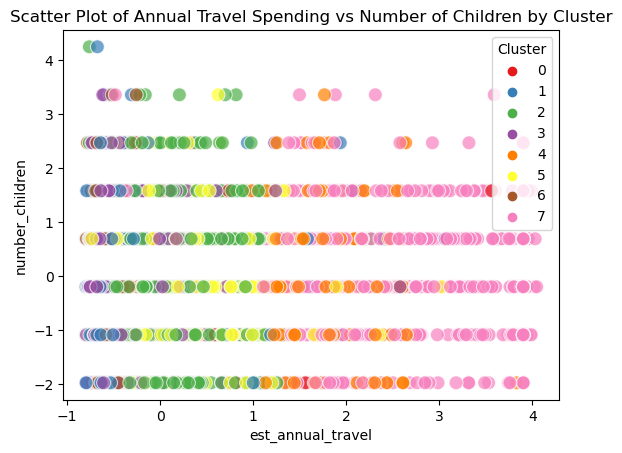

In [55]:
sns.scatterplot(x='est_annual_travel', y='number_children', hue='Cluster', data=df2, palette='Set1',alpha=0.7,s=100)
plt.title('Scatter Plot of Annual Travel Spending vs Number of Children by Cluster')
plt.show()


The scatterplot shows estimated annual travel and the number of children for each cluster.  People in cluster eight are more likely to have larger incomes and may have children. People in cluster three most likely have children and have average incomes. 

Text(0, 0.5, 'Standardized Est Annual Travel Spending')

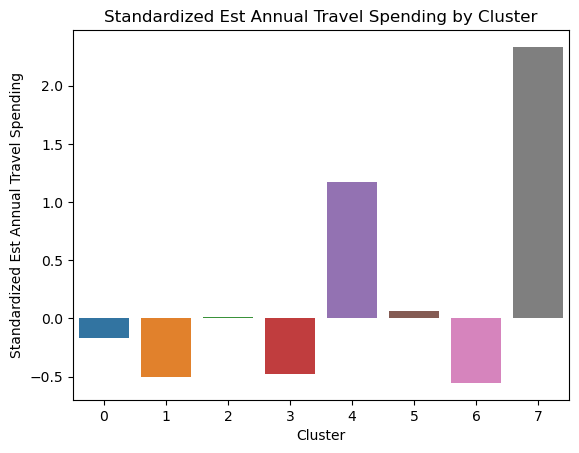

In [56]:
sns.barplot(x='Cluster', y = 'est_annual_travel',errorbar=None, data = df2)
plt.title('Standardized Est Annual Travel Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Est Annual Travel Spending')

The bar chart shows standardized estimated annual travel spending by cluster.  Clusters five and eight spend more money on travel compared to the other clusters. 

/var/folders/c5/nhcfmh2d3h3fv9cztdmg36vm0000gn/T/ipykernel_7472/4076048393.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cluster', y='est_annual_travel', data=df2, jitter=True, palette='Set1', size=7, alpha=0.7)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


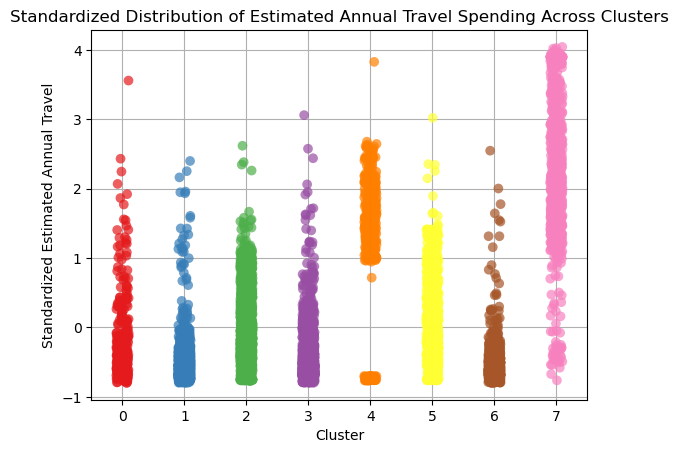

In [57]:
sns.stripplot(x='Cluster', y='est_annual_travel', data=df2, jitter=True, palette='Set1', size=7, alpha=0.7)
plt.title('Standardized Distribution of Estimated Annual Travel Spending Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Standardized Estimated Annual Travel')
plt.grid(True)
plt.show()





The strip plot shows how standardized annual travel spending varies for each cluster. It highlights where most of the customers fall within each cluster and also shows the variability and outliers. Cluster six has customers that fall across the spending ranges, indicating greater variablilty in their travel spending. 

Text(0, 0.5, 'Standardized Disney Plus Subscribers')

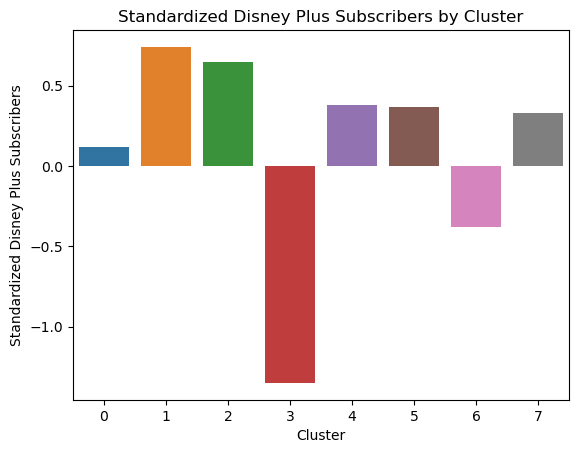

In [58]:
sns.barplot(x='Cluster', y = 'dis_plus_sub',errorbar=None, data = df2)
plt.title('Standardized Disney Plus Subscribers by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Disney Plus Subscribers')

The bar chart shows standardized data of Disney Plus subscribers by cluster. People in cluster four and seven are less likely to be subscribed to Disney Plus. 

Text(0, 0.5, 'Standardized Estimated Income')

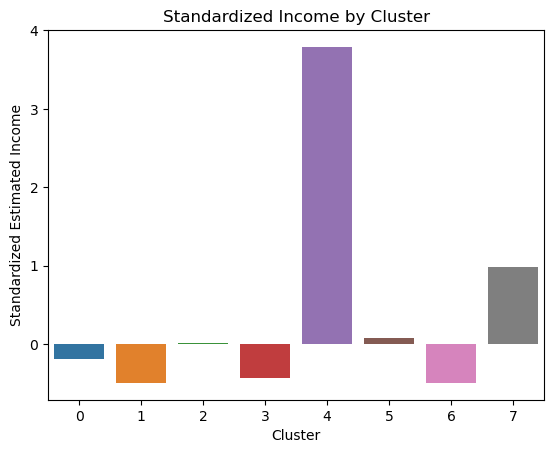

In [59]:
sns.barplot(x='Cluster', y = 'est_inc',errorbar=None, data = df2)
plt.title('Standardized Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Estimated Income')

The bar chart shows standardized estimated income by cluster. Clusters five and eight have higher incomes on average compared to the other clusters.

### Conclusion


Disney Park Fanatics (Cluster 1) : This group frequently visits the Parks but is less likely to have children. On average, they are subscribers to Disney Plus and have lower incomes compared to other clusters. To reach Disney Park Fanatics, it is recomended to create events and seasonal deals that this group can participate in.  Since they do not have children, it is recomended to market events that are catered towards adults. A rewards program may also be beneficial to increase visits for the this group. 

On a Budget (Cluster 2): On a Budget cluster is most likely to consist of large families with lower incomes.  They do not spend much on travel but they are more likely to be subscribed to Disney Plus and most likely live in U.S. To reach consumers in this group, it is recomended to offer family packages that cater to larger families, such as including free entry for a child, meal vouchers, and hotel deals. 

Average Consumers (Cluster 3): People in the Average Consumers cluster are most likely subscribed to Disney Plus and have an average income. They have more children compared to other clusters and spend money on travel close to the average. They visit the parks an average amount of times. To reach the Average Consumers, it is recomended to market the family-friendly aspects of the theme parks and offer family packages that may include perks like meal vouchers. 

No Engagement (Cluster 4): People in the No Engagement cluster most likley have low incomes and do not spend much money on travel and leisure.  They are also less likley to be Disney Plus subscribers and do not have children. It is recomended to focus enagement on other population segments, as this group has low income and less likely to have children. 

High Earners (Cluster 5): People in the High Earners cluster most likely have high incomes, a large travel spending budget, but may not have children. They are most likely subscribed to Disney Plus and enjoy spending money on online merchandise. To reach the High Earners cluster, it is recomended to offer exclusive vacation packages that are geared towards adults, like dining and hotel experiences, and exclusive in parks merchandise offers. 

International Fans (Cluster 6): People in the International Fans cluster are most likely live outside of the U.S. They have incomes close to the average and spend money on travel and leisure at an average rate. They are big spenders on online merchandise and are average subscribers to Disney Plus. To reach the International Fans, it is recomended to offer exlusive merchandise that can only be purchased at the theme parks and to provide discounts on travel packages for international visitors. 

International Low Engagement (Cluster 7): People in cthe International Low Engagement cluster most likely do not live in the U.S.,have low incomes, and do not spend much money on travel, leisure, or online merchandise.  They are not subscribers to Disney Plus and visit the theme parks less often than other clusters. Considering the low income of the International Low Engagment cluster, it is recomended to offer budget travel packages to Disney Parks that includes flights.  

Big Spenders (Cluster 8): People in the Big Spenders cluster are most likely to have high incomes and spend significant amount of money on travel, leisure, and online merchandise. They are most likley to be Disney Plus subscribers and visit the theme parks an average amount. They are also likely to have children. To reach the Big Spenders, it is recomended to offer exlcusive vacation package with high-end offerings such as luxery hotel stays, dining reservations, and group experiences in the parks.   









